In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 12)
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = "bold"

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


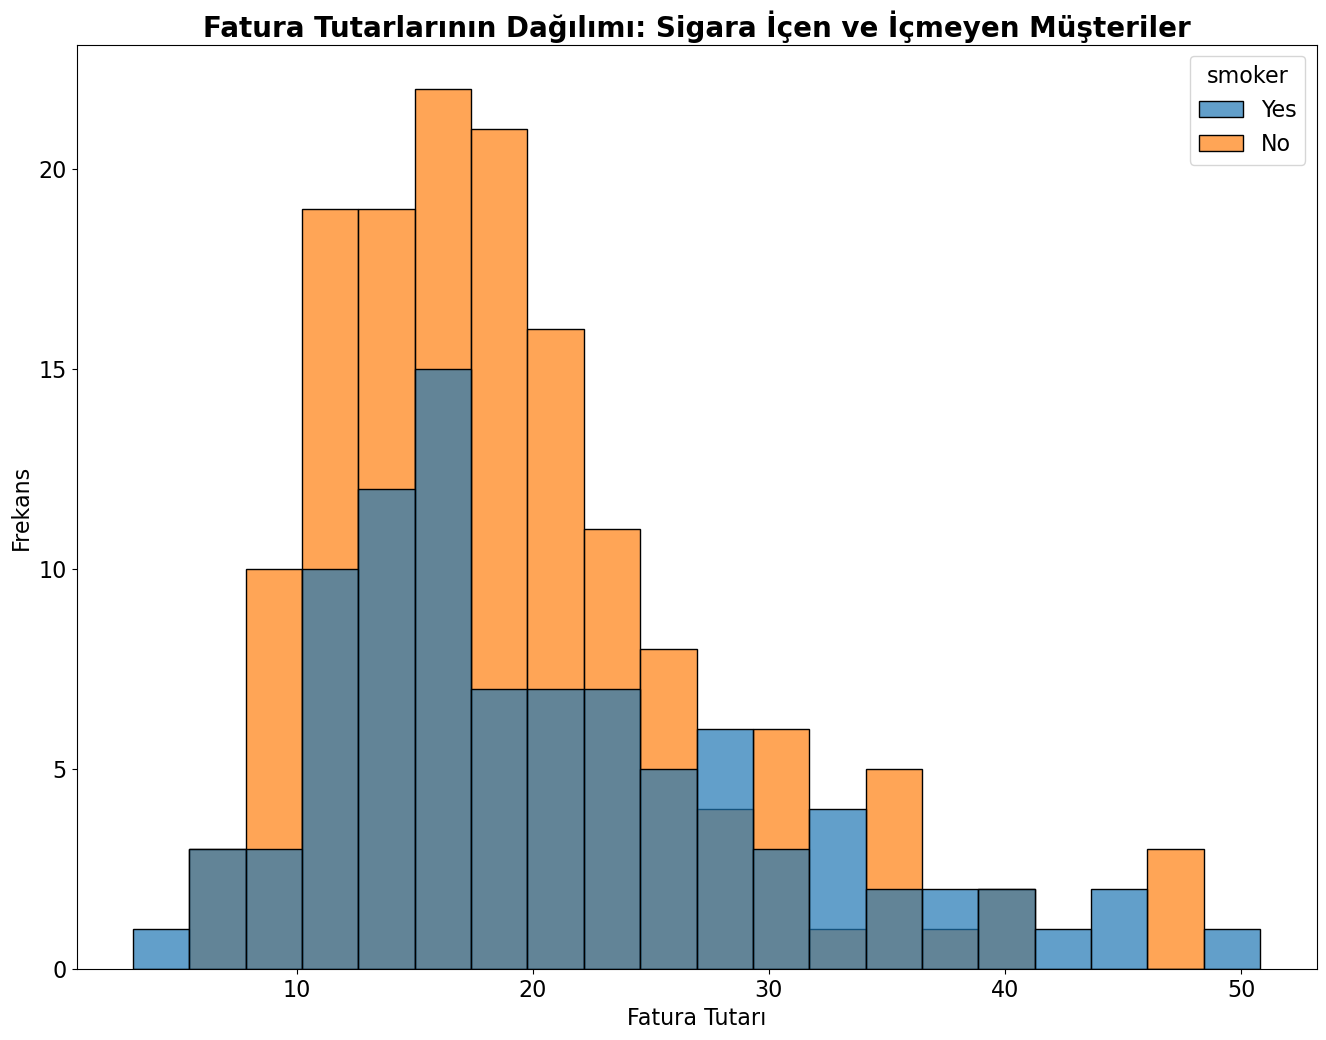

In [7]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.
g =sns.histplot(data = tips, bins = 20,
            x = "total_bill",
            hue = "smoker",
            alpha= 0.7)
g.set_title("Fatura Tutarlarının Dağılımı: Sigara İçen ve İçmeyen Müşteriler")
g.set_xlabel("Fatura Tutarı")
g.set_ylabel("Frekans")

plt.show()

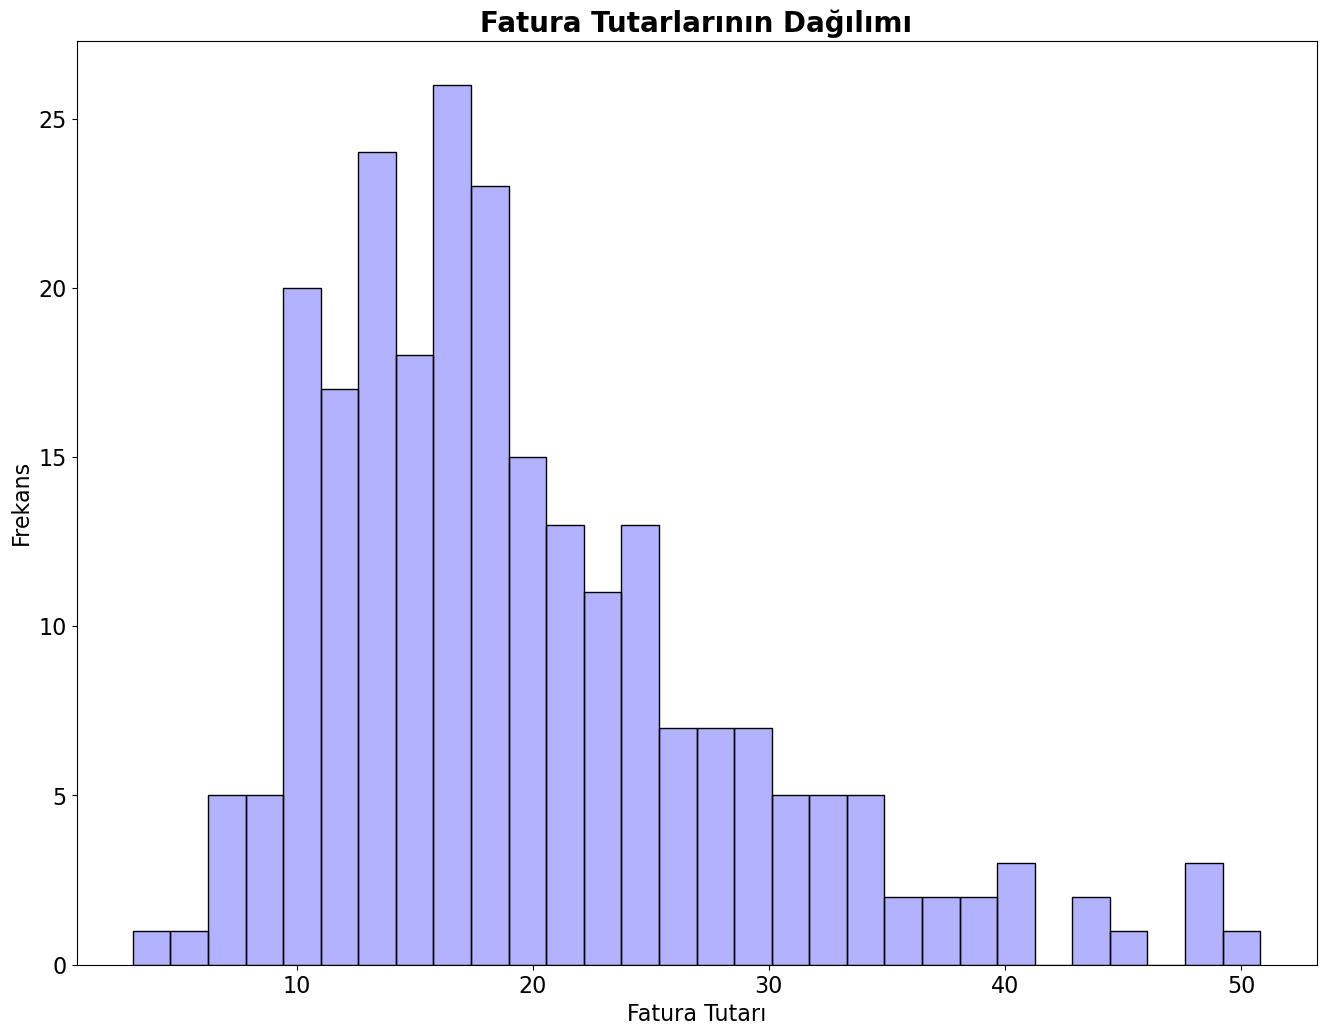

In [9]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.
g = sns.histplot(data= tips, bins= 30,
                x= "total_bill",
                color= "blue",
                alpha= 0.3)
g.set_title("Fatura Tutarlarının Dağılımı")
g.set_xlabel("Fatura Tutarı")
g.set_ylabel("Frekans")

plt.show()

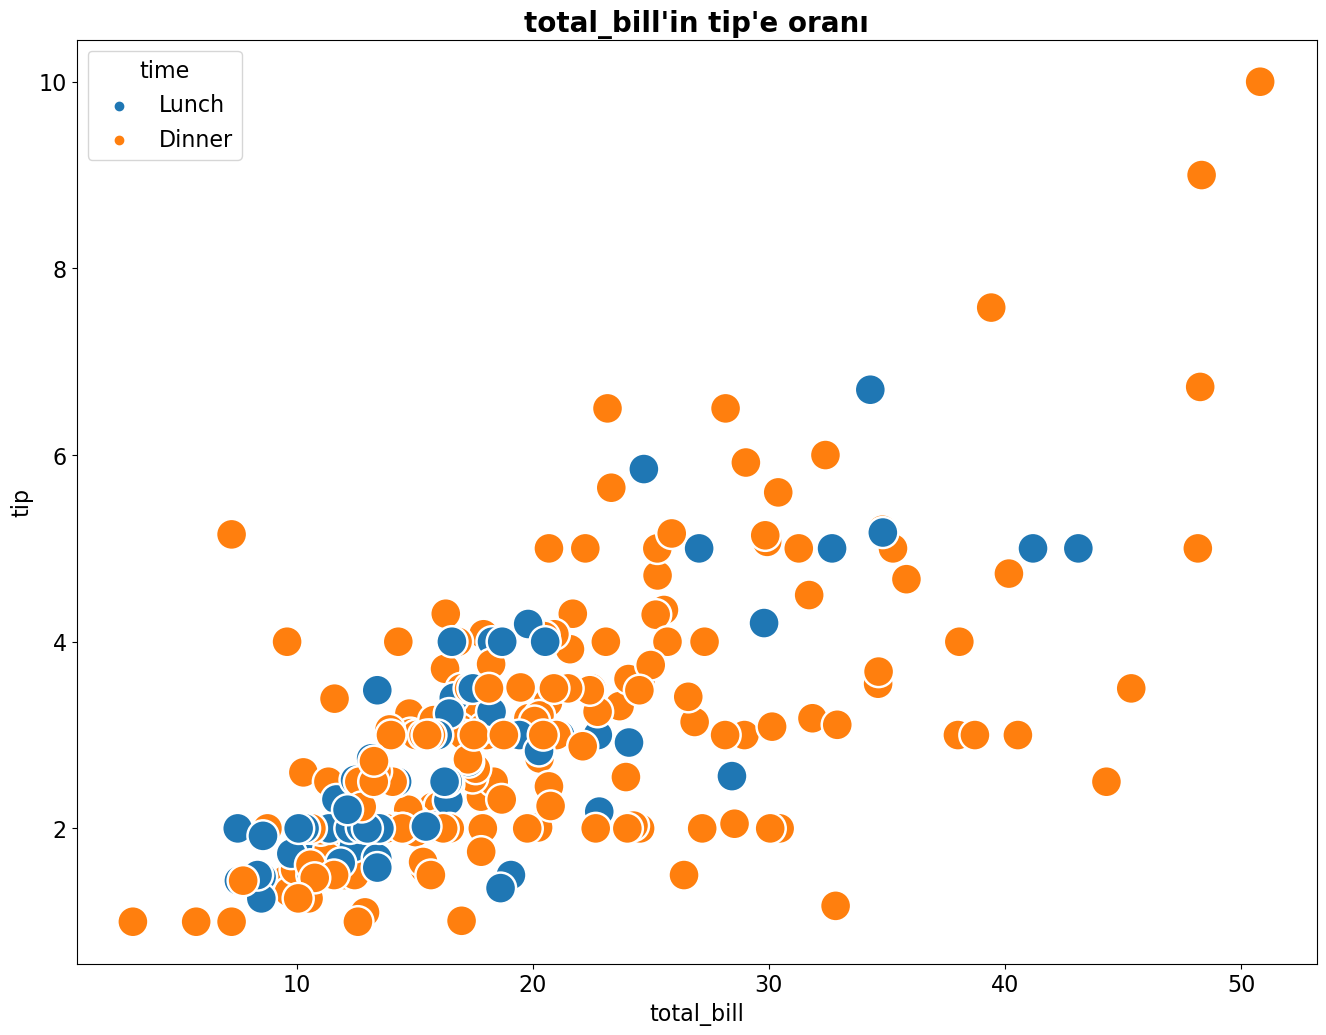

In [13]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.

g = sns.scatterplot(data = tips,
                   x = "total_bill",
                   y = "tip",
                   hue = "time",
                   s = 500
                   )
g.set_title("total_bill'in tip'e oranı")
g.set_ylabel("tip")
g.set_xlabel("total_bill")
plt.show()

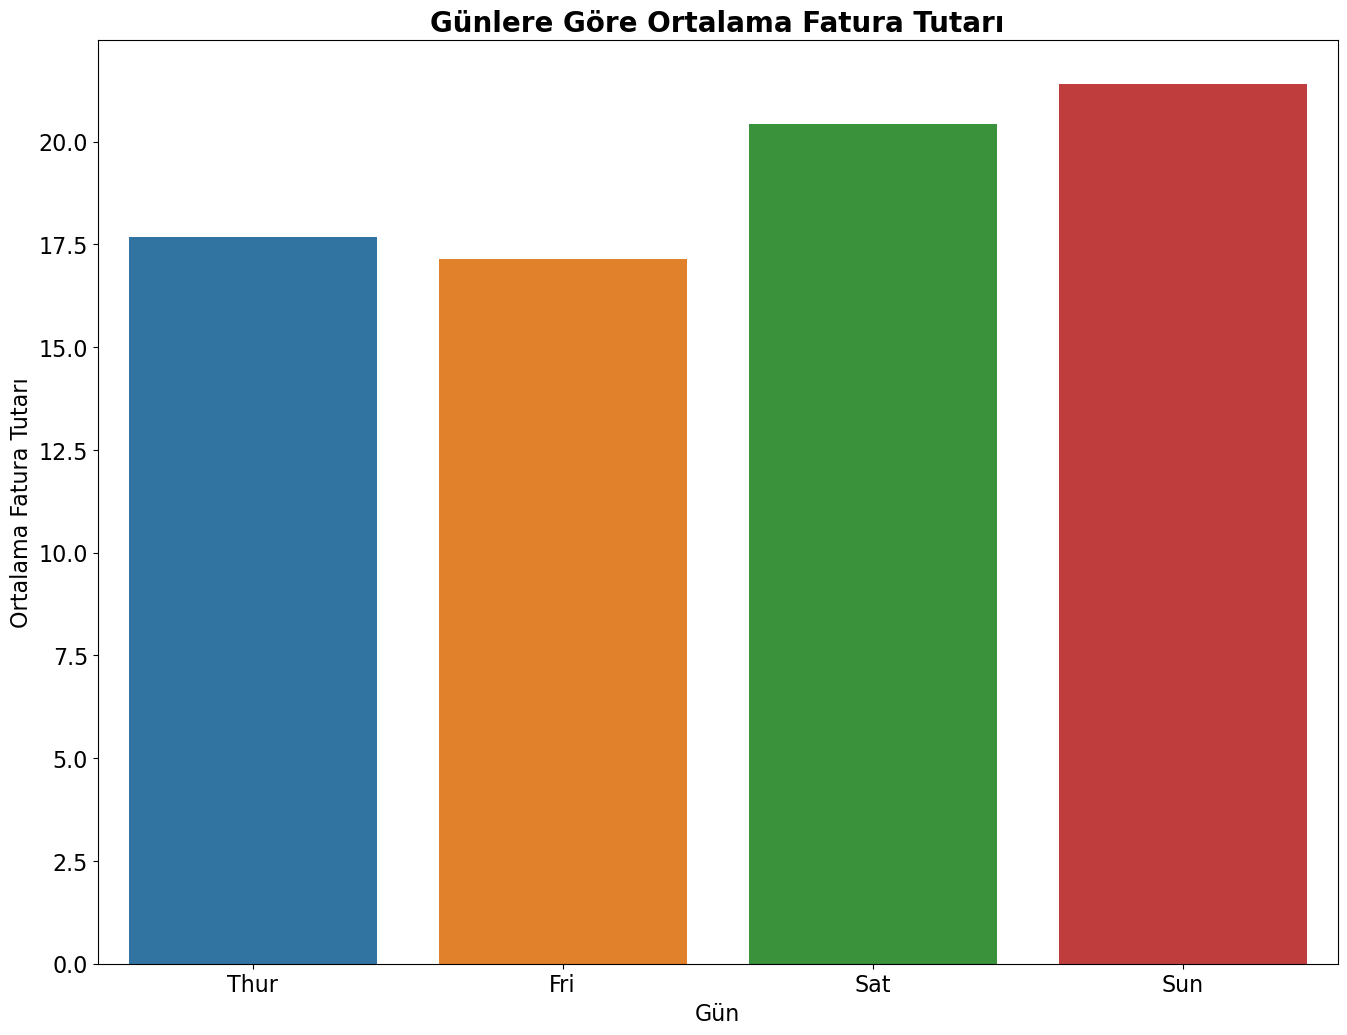

In [16]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.

g = sns.barplot(data = tips,
               x = "day",
               y = "total_bill",
               errorbar= None)
g.set_title("Günlere Göre Ortalama Fatura Tutarı")
g.set_xlabel("Gün")
g.set_ylabel("Ortalama Fatura Tutarı")

plt.show()

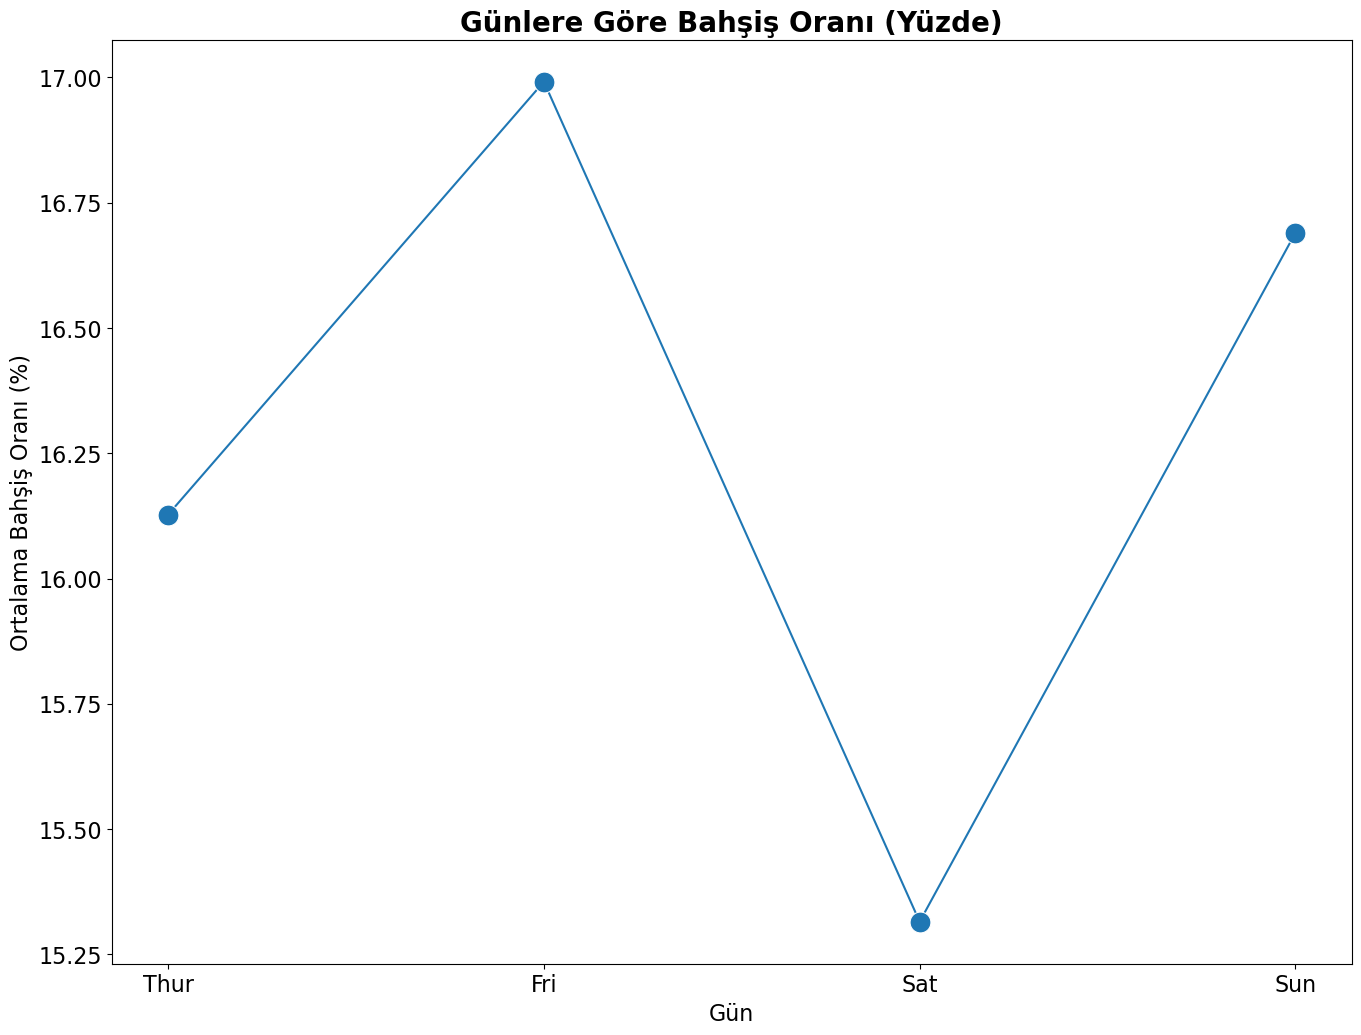

In [32]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.
tips["tip_percentage"] = (tips["tip"] / tips["total_bill"]) * 100
mean_tip_percentage_by_day = tips.groupby("day")["tip_percentage"].mean().reset_index()

g = sns.lineplot(data = mean_tip_percentage_by_day,
                x = "day",
                y = "tip_percentage",
                marker = "o",
                markersize= 15)
g.set_title("Günlere Göre Bahşiş Oranı (Yüzde)")
g.set_xlabel("Gün")
g.set_ylabel("Ortalama Bahşiş Oranı (%)")

plt.show()

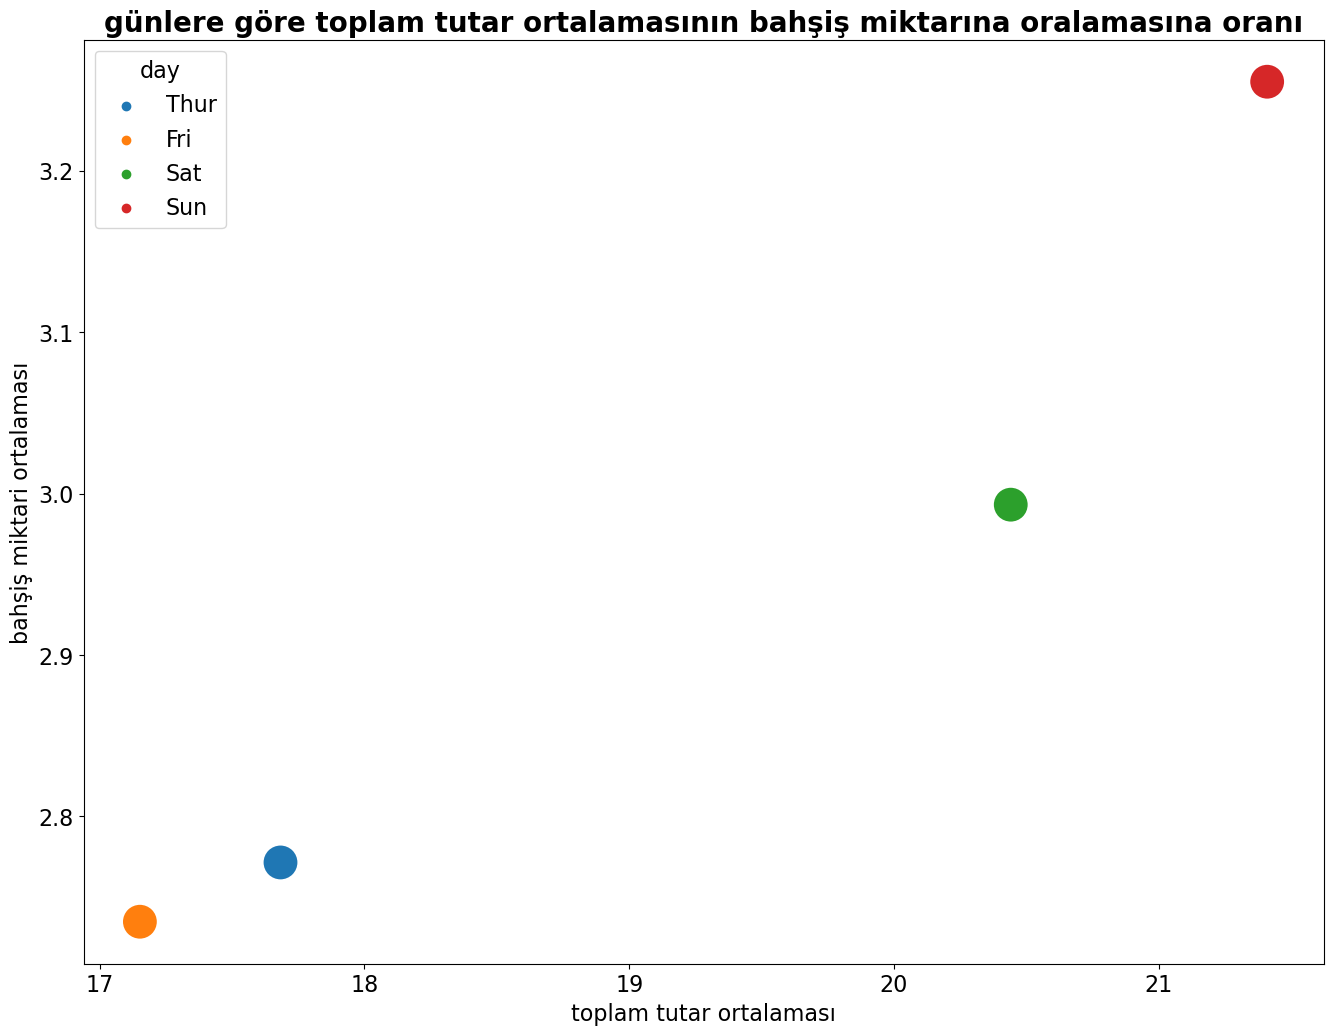

In [39]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.
mean_total_bill_and_tip_by_day = tips.groupby("day").agg({"total_bill" : "mean",
                                                         "tip" : "mean"}).reset_index()
g = sns.scatterplot(data = mean_total_bill_and_tip_by_day,
               x = "total_bill",
               y = "tip",
               hue = "day",
               s= 700)
g.set_title("günlere göre toplam tutar ortalamasının bahşiş miktarına oralamasına oranı")
g.set_xlabel("toplam tutar ortalaması")
g.set_ylabel("bahşiş miktari ortalaması")
plt.show()

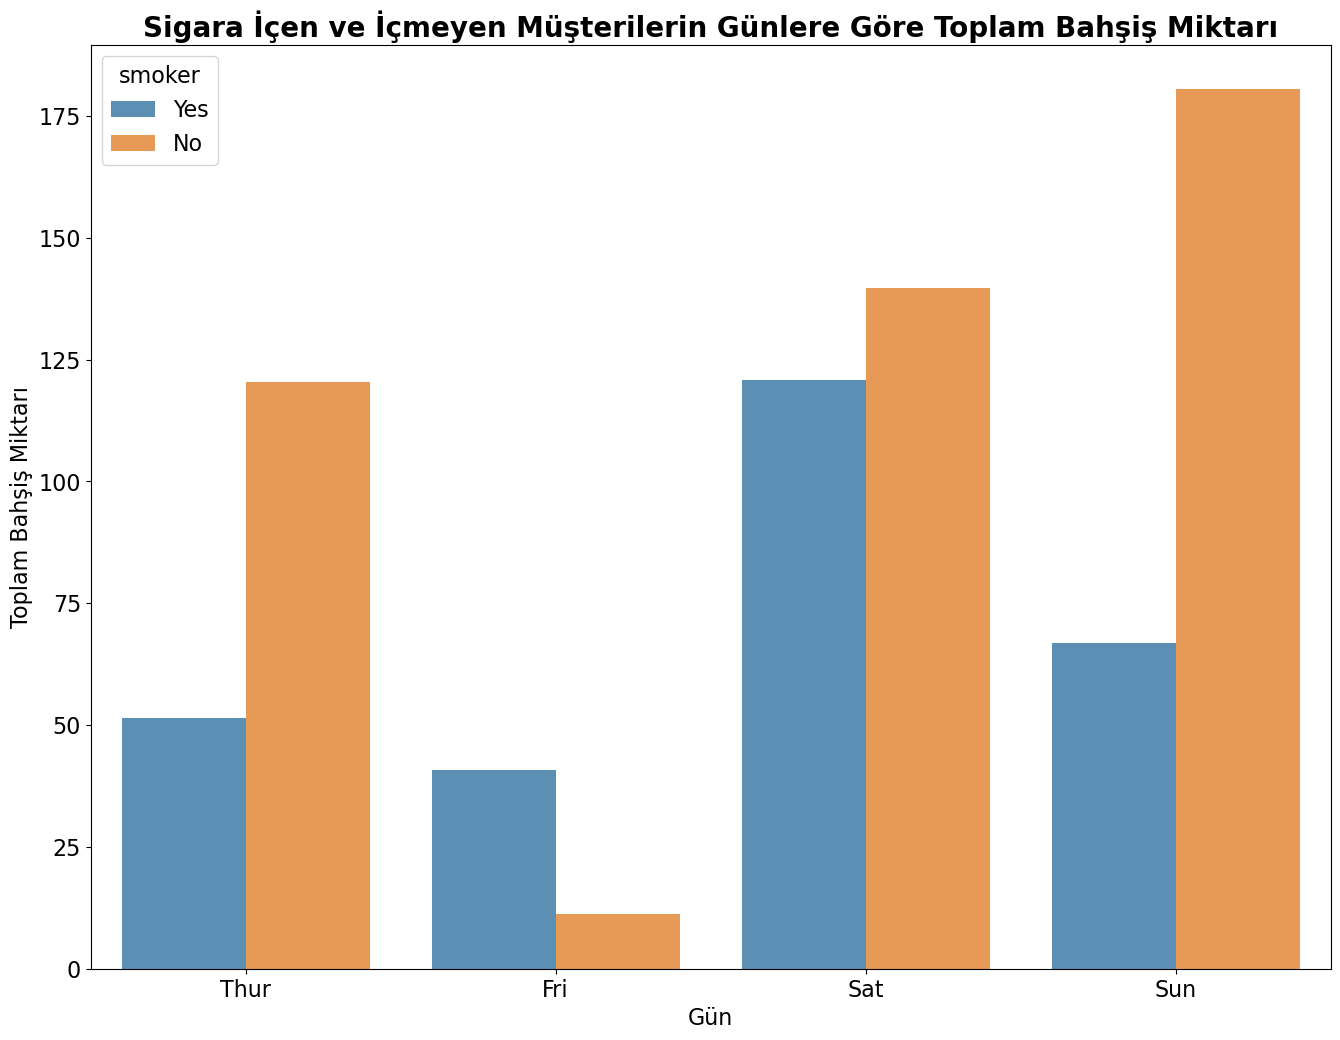

In [45]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.
total_tips_by_day_and_smoker = tips.groupby(["day", "smoker"]).agg({"tip" : "sum"}).reset_index()
g = sns.barplot(data = total_tips_by_day_and_smoker,
               x = "day",
               y = "tip",
               hue = "smoker",
               alpha = 0.8)
g.set_title("Sigara İçen ve İçmeyen Müşterilerin Günlere Göre Toplam Bahşiş Miktarı")
g.set_xlabel("Gün")
g.set_ylabel("Toplam Bahşiş Miktarı")

plt.show()

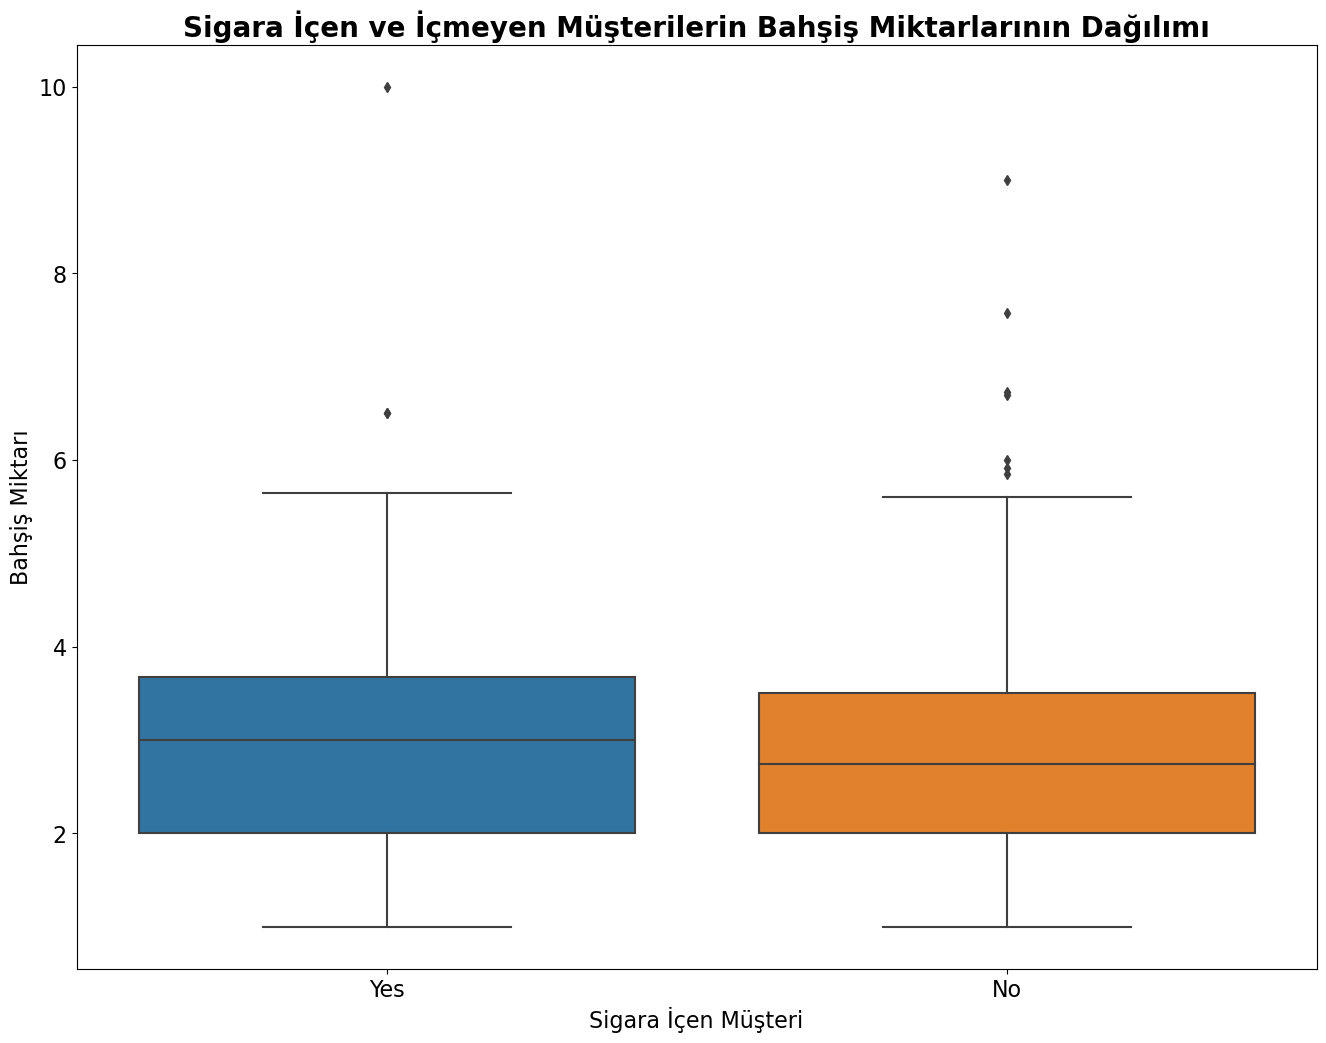

In [47]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.
g = sns.boxplot(data = tips,
               x = "smoker",
               y = "tip")
g.set_title("Sigara İçen ve İçmeyen Müşterilerin Bahşiş Miktarlarının Dağılımı")
g.set_xlabel("Sigara İçen Müşteri")
g.set_ylabel("Bahşiş Miktarı")

plt.show()

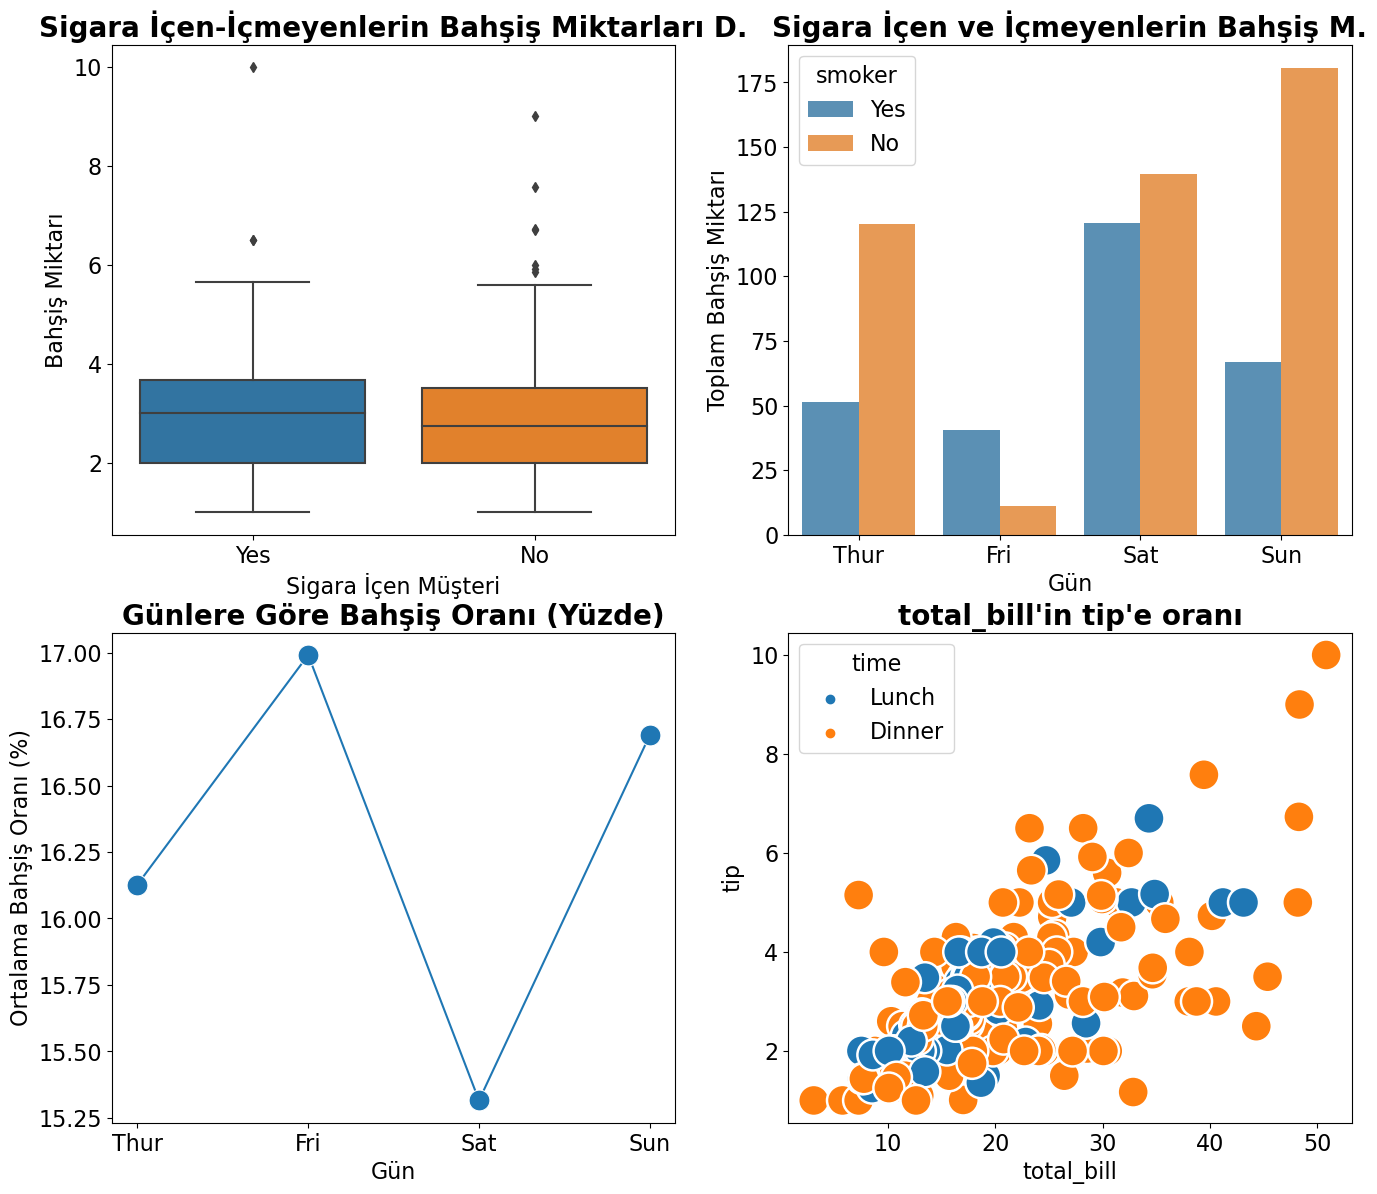

In [60]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.
fig , axes = plt.subplots(2, 2, figsize= (16,14))
#1
g1 = sns.boxplot(data = tips,
               x = "smoker",
               y = "tip",
               ax = axes[0,0])
axes[0,0].set_title("Sigara İçen-İçmeyenlerin Bahşiş Miktarları D.")
axes[0,0].set_xlabel("Sigara İçen Müşteri")
axes[0,0].set_ylabel("Bahşiş Miktarı")

#2 
total_tips_by_day_and_smoker = tips.groupby(["day", "smoker"]).agg({"tip" : "sum"}).reset_index()
g2 = sns.barplot(data = total_tips_by_day_and_smoker,
               x = "day",
               y = "tip",
               hue = "smoker",
               alpha = 0.8,
                ax = axes[0,1])
axes[0,1].set_title("Sigara İçen ve İçmeyenlerin Bahşiş M.")
axes[0,1].set_xlabel("Gün")
axes[0,1].set_ylabel("Toplam Bahşiş Miktarı")

#3
tips["tip_percentage"] = (tips["tip"] / tips["total_bill"]) * 100
mean_tip_percentage_by_day = tips.groupby("day")["tip_percentage"].mean().reset_index()

g3 = sns.lineplot(data = mean_tip_percentage_by_day,
                x = "day",
                y = "tip_percentage",
                marker = "o",
                markersize= 15,
                 ax = axes[1,0])
axes[1,0].set_title("Günlere Göre Bahşiş Oranı (Yüzde)")
axes[1,0].set_xlabel("Gün")
axes[1,0].set_ylabel("Ortalama Bahşiş Oranı (%)")

#4
g4 = sns.scatterplot(data = tips,
                   x = "total_bill",
                   y = "tip",
                   hue = "time",
                   s = 500,
                   ax = axes[1,1]
                    )
axes[1,1].set_title("total_bill'in tip'e oranı")
axes[1,1].set_ylabel("tip")
axes[1,1].set_xlabel("total_bill")
plt.show()